In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import stats

In [2]:
df = pd.read_csv('ga_sessions.csv', low_memory=False)
pd.set_option('display.max_columns', 30)

In [3]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


# EDA

In [4]:
#Проверил датафрейм на наличие дубликатов
df.duplicated().value_counts()

False    1860042
Name: count, dtype: int64

In [5]:
#Написал функцию, которая выводит процент пропущенных значений
def missing_values(df):
    return (df.isna().sum() / len(df) * 100).sort_values()

In [7]:
df.isna()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False
1860038,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False
1860039,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1860040,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [6]:
missing_values(df)

session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [7]:
#Удалил неинформативные колонки и обработал пропуски
df_sessions = df.drop(['device_os', 'utm_keyword', 'device_model', 'utm_adcontent'], axis=1)
df_sessions.device_brand = df_sessions.device_brand.fillna('other')
df_sessions.utm_campaign = df_sessions.utm_campaign.fillna(df_sessions.utm_campaign.mode)
df_sessions.utm_source = df_sessions.utm_source.fillna(df_sessions.utm_source.mode)
missing_values(df_sessions)

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

In [8]:
df_sessions.geo_city.value_counts()

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64

In [9]:
#Обработал пропуски в колонке города
df_sessions['geo_city'] = df_sessions['geo_city'].replace(['(not set)'], ['Moscow'])

In [10]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [11]:
missing_values(df_hits)

session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
hit_referer        39.899634
hit_time           58.247795
event_value       100.000000
dtype: float64

In [12]:
#Удалил неинформативные колонки
df2_hits = df_hits.drop(columns=['event_label', 'hit_referer', 'event_value', 'hit_time'])
missing_values(df2_hits)

session_id        0.0
hit_date          0.0
hit_number        0.0
hit_type          0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
dtype: float64

In [13]:
#Написал функцию, которая обробатывает действия клиентов и разделяет их на целевые и нет
target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df2_hits['target'] = df2_hits['event_action'].apply(lambda x: 1 * (x in target_actions))

In [14]:
df2_hits['target'].value_counts()

0    15621562
1      104908
Name: target, dtype: int64

In [15]:
#Удалил дубликаты в session_id, оставив в приоритете те, что с целевым действием
sorted_df2_hits = df2_hits.sort_values(by = 'target', ascending=False)
sorted_df2_hits = sorted_df2_hits.drop_duplicates(subset=['session_id'])

In [16]:
#Объединил таблицы по session_id
df_new = pd.merge(df_sessions, sorted_df2_hits, how = 'right', on = 'session_id')
df_new

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,target
0,6179223854743097617.1637159185.1637159185,1438712667.1637159185,2021-11-17,17:26:25,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,851x393,Chrome,Russia,Moscow,2021-11-17,7,event,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,1
1,4699801569096202312.1624078380.1624078380,1094257824.1624078408,2021-06-19,07:00:00,1.0,QxAxdyPLuQMEcrdZWdWb,cpm,MvfHsxITijuriZxsqZqt,mobile,Samsung,412x846,Android Webview,Russia,Moscow,2021-06-19,59,event,sberauto.com/cars/9e072915?rental_page=rental_car,sub_submit,sub_submit_success,1
2,1801649305254289434.1637962491.1637962491,419479167.1635967002,2021-11-27,00:34:51,5.0,GmILPdZyuAVJCPsUBHeN,clicks,TIRYvHSoLonAvRZefPmz,mobile,Xiaomi,393x873,Android Webview,Russia,Moscow,2021-11-27,36,event,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,sub_button_click,sub_car_claim_click,1
3,4048550910603965046.1638019713.1638020096,942626714.1638019702,2021-11-27,16:34:56,1.0,bByPQxmDaMXgpHeypKSM,referral,qTERPbkOaRvjtQXXEwdb,mobile,Samsung,412x892,Chrome,Russia,Kazan,2021-11-27,77,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_car_claim_click,1
4,4567414893036408382.1631817281.1631817281,1063434149.1631817278,2021-09-16,21:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Samsung,360x640,Chrome,Russia,Saint Petersburg,2021-09-16,18,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_submit,sub_submit_success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734605,4969152450131475421.1625166747.1625166747,1156970963.1624849373,2021-07-01,22:00:00,4.0,kjsLglQLzykiRbcDiGcD,cpc,<bound method Series.mode of 0 LEoPHu...,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-07-01,3,event,sberauto.com/cars?utm_source_initial=google&ut...,search_form,search_form_rental,0
1734606,127612641154543369.1625157030.1625157030,29712133.1625141001,2021-07-01,19:00:00,2.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Apple,390x844,Safari,Russia,Moscow,2021-07-01,1,event,sberauto.com/cars?city=1&city=18&rental_car=re...,quiz,quiz_show,0
1734607,3568021323745446104.1625172488.1625172488,830744701.1625147608,2021-07-01,23:00:00,2.0,ZpYIoDJMcFzVoPFsHGJL,banner,eimRuUrNhZLAYcwRrNXu,mobile,Apple,428x926,Safari,Russia,Moscow,2021-07-01,1,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,quiz,quiz_show,0
1734608,4105839722710830650.1625167937.1625167937,955965305.1625165370,2021-07-01,22:00:00,2.0,ZpYIoDJMcFzVoPFsHGJL,banner,MXqmDyetMTICSSitTjWV,mobile,Apple,428x926,Safari,Russia,Moscow,2021-07-01,2,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,quiz,quiz_start,0


In [17]:
df_new.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,target
0,6179223854743097617.1637159185.1637159185,1438712667.1637159185,2021-11-17,17:26:25,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,851x393,Chrome,Russia,Moscow,2021-11-17,7,event,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,1
1,4699801569096202312.1624078380.1624078380,1094257824.1624078408,2021-06-19,07:00:00,1.0,QxAxdyPLuQMEcrdZWdWb,cpm,MvfHsxITijuriZxsqZqt,mobile,Samsung,412x846,Android Webview,Russia,Moscow,2021-06-19,59,event,sberauto.com/cars/9e072915?rental_page=rental_car,sub_submit,sub_submit_success,1
2,1801649305254289434.1637962491.1637962491,419479167.1635967002,2021-11-27,00:34:51,5.0,GmILPdZyuAVJCPsUBHeN,clicks,TIRYvHSoLonAvRZefPmz,mobile,Xiaomi,393x873,Android Webview,Russia,Moscow,2021-11-27,36,event,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,sub_button_click,sub_car_claim_click,1
3,4048550910603965046.1638019713.1638020096,942626714.1638019702,2021-11-27,16:34:56,1.0,bByPQxmDaMXgpHeypKSM,referral,qTERPbkOaRvjtQXXEwdb,mobile,Samsung,412x892,Chrome,Russia,Kazan,2021-11-27,77,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_car_claim_click,1
4,4567414893036408382.1631817281.1631817281,1063434149.1631817278,2021-09-16,21:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Samsung,360x640,Chrome,Russia,Saint Petersburg,2021-09-16,18,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_submit,sub_submit_success,1


# Вопрос 1

H0 - Органический трафик НЕ отличается от платного с точки зрения CR                                  
H1 - Органический трафик отличается от платного с точки зрения CR

In [18]:
#Написал функцию, которая обрабатывает тип траффика, оставляя только два значения
def sort_values(value):
    traffic = ['organic', 'referral', '(none)']
    if value in traffic:
        return 'organic'
    else:
        return 'paid'
df_new['traffic_type'] = df_new.utm_medium.apply(sort_values)

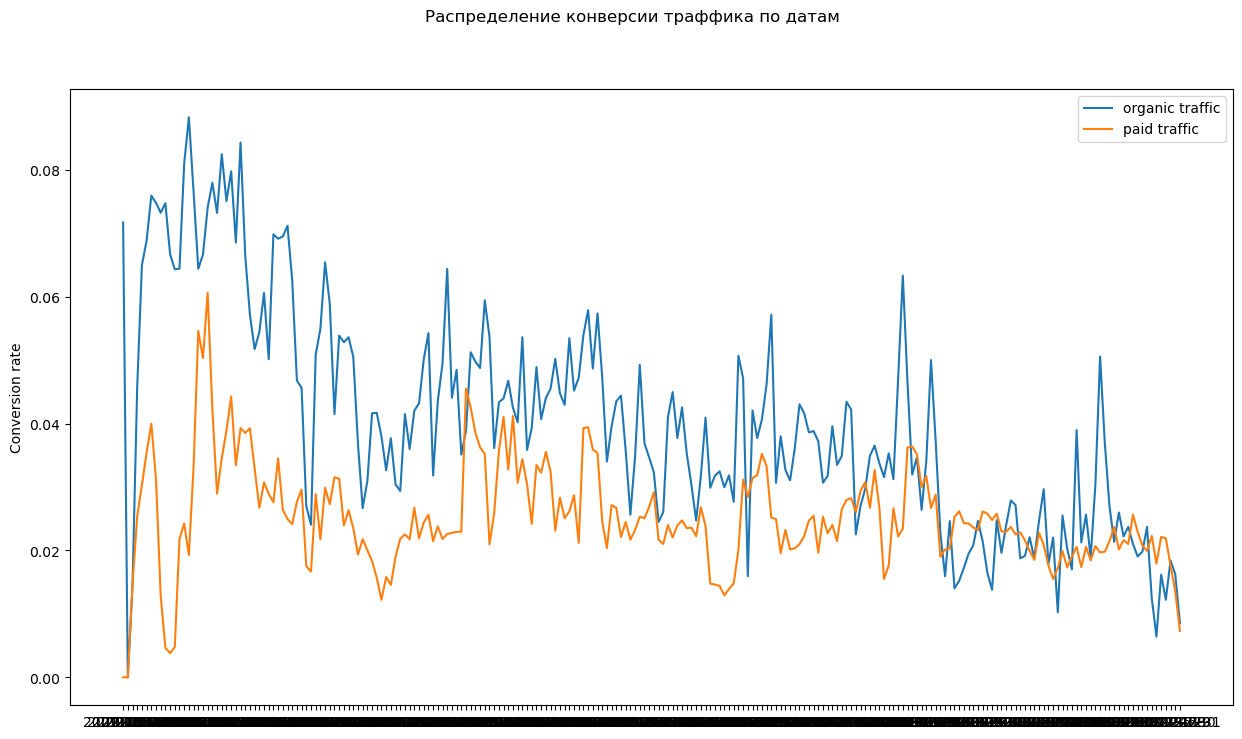

In [19]:
#Построил график распределения конрверсии траффика по датам
organic = (df_new[df_new['traffic_type'] == 'organic'])
paid = (df_new[df_new['traffic_type'] == 'paid'])
df1 = organic.groupby(['visit_date']).agg({'target': 'mean'})
df2 = paid.groupby(['visit_date']).agg({'target': 'mean'})

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(df1.index, df1['target'], label='organic traffic')
ax.plot(df2.index, df2['target'], label='paid traffic')
ax.set_ylabel('Conversion rate')
fig.suptitle('Распределение конверсии траффика по датам')
plt.legend()
plt.show;

In [20]:
#Построил сводную таблицу показывающую конверсию траффиков за всё время
traffic = df_new.groupby(['traffic_type'], as_index=False).agg({'target': 'mean'})
traffic = traffic.rename(columns={'target': 'CR'})
traffic

,traffic_type,CR
0,organic,0.044383
1,paid,0.023661


In [21]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(organic.target, paid.target)

(72.02270819314585, 0.0)

В результате теста p-value оказалось слишком низким, чтобы принять нулевую гипотезу, значит траффики отличаются

# Вопрос 2

Н0 - Трафик с мобильных устройств НЕ отличается от трафика с десктопных устройств с точки зрения CR       
Н1 - Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR

In [23]:
#Построил сводную таблицу для типов устройств, удалив ненужные атрибуты
device = df_new.groupby(['device_category'], as_index=False).agg({'target': 'mean'})
device = device.rename(columns={'target': 'CR'})
device = device.drop(index = [2])
device

,device_category,CR
0,desktop,0.033189
1,mobile,0.028041


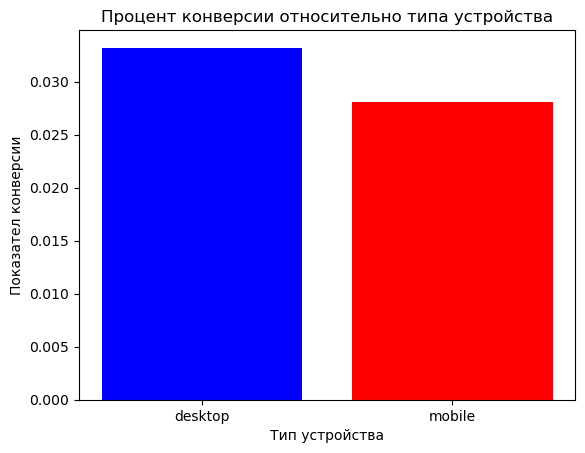

In [52]:
#Построил граффик для наглядности
plt.bar(device['device_category'], device['CR'], color=['b', 'r'])
plt.xlabel('Тип устройства')
plt.ylabel('Показател конверсии')
plt.title('Процент конверсии относительно типа устройства');

In [24]:
#Так же провел Z-тест, который показал, что принимается нулевая гипотеза о неравенстве траффиков
desktop = (df_new[df_new['device_category'] == 'desktop'])
mobile = (df_new[df_new['device_category'] == 'mobile'])
ztest(desktop.target, mobile.target, value = 0)

(16.118626057151307, 1.88759388520695e-58)

После проведения Z-теста, который показал p-value меньше 5%, мы принимает альтернативную гипотезу о неравенстве траффиков устройств

# Вопрос 3

Н0 - Трафик из городов присутствия (Москва и область, Санкт-Петербург) НЕ отличается от трафика из иных регионов с точки зрения CR        
Н1 - Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR

In [26]:
df_new.geo_city.value_counts()

Moscow              824225
Saint Petersburg    278402
Yekaterinburg        33555
Krasnodar            30260
Kazan                27689
                     ...  
Carlow                   1
Duderstadt               1
Poularies                1
Kirikkale                1
Kashiwa                  1
Name: geo_city, Length: 2388, dtype: int64

In [27]:
#Для ответа на 3 вопрос нашёл в интернете таблицу со списком городов МО и прочитал её удалив лишние столбцы
df_Moscow_region = pd.read_excel('../Desktop/города.xlsx', header = None, index_col = 0)
df_Moscow_region = df_Moscow_region.drop(2, axis = 1)
df_Moscow_region.head()

,1
0,
1,Балашиха
2,Подольск
3,Химки
4,Мытищи
5,Королёв


In [28]:
#Перевёл все города в таблице на английский язык
import translators as ts
df_Moscow_region['Eng'] = df_Moscow_region[1].apply(lambda x: ts.translate_text(x))

In [29]:
df_Moscow_region.head()

,1,Eng
0,,
1,Балашиха,Balashikha
2,Подольск,Podolsk
3,Химки,FC Khimki
4,Мытищи,Mytishchi
5,Королёв,Korolev


In [30]:
#Удалил столбец с Российскими названиями и создал список городов относящихся к МО + Санкт-Петербург
df_Moscow_region = df_Moscow_region.replace(['FC Khimki'], 'Khimki')
df_Moscow_region2 = df_Moscow_region.drop(1 ,axis = 1)
capital = list(df_Moscow_region['Eng'])
capital.append(['Moscow', 'Saint Petersburg'])

In [31]:
#Написал функцию, которая преобразует города и создаёт новый признак содержащий только два значения
def sort_values_cities(value):
    if value in capital:
        return 'capital'
    else:
        return 'other'
df_new['filtered_cities'] = df_new['geo_city'].apply(sort_values_cities)

In [32]:
df_new['filtered_cities'].value_counts()

other      1660603
capital      74007
Name: filtered_cities, dtype: int64

In [33]:
#Создал сводную таблицу для городов присутствия
cities = df_new.groupby(['filtered_cities'], as_index=False).agg({'target': 'mean'})
cities = cities.rename(columns={'target': 'CR'})
cities

,filtered_cities,CR
0,capital,0.031619
1,other,0.029158


In [34]:
capital = (df_new[df_new['filtered_cities'] == 'capital'])
other = (df_new[df_new['filtered_cities'] == 'other'])
ztest(capital.target, other.target, value = 0)

(3.8858958716155008, 0.00010195320360987704)

Провёл Z-тест, который дал p-value < 5%, значит траффики отличаются и мы принимаем альтернативную гипотезу

# Вопрос 4

In [35]:
df_new.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,target,traffic_type,filtered_cities
0,6179223854743097617.1637159185.1637159185,1438712667.1637159185,2021-11-17,17:26:25,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,851x393,Chrome,Russia,Moscow,2021-11-17,7,event,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,1,paid,other
1,4699801569096202312.1624078380.1624078380,1094257824.1624078408,2021-06-19,07:00:00,1.0,QxAxdyPLuQMEcrdZWdWb,cpm,MvfHsxITijuriZxsqZqt,mobile,Samsung,412x846,Android Webview,Russia,Moscow,2021-06-19,59,event,sberauto.com/cars/9e072915?rental_page=rental_car,sub_submit,sub_submit_success,1,paid,other
2,1801649305254289434.1637962491.1637962491,419479167.1635967002,2021-11-27,00:34:51,5.0,GmILPdZyuAVJCPsUBHeN,clicks,TIRYvHSoLonAvRZefPmz,mobile,Xiaomi,393x873,Android Webview,Russia,Moscow,2021-11-27,36,event,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,sub_button_click,sub_car_claim_click,1,paid,other
3,4048550910603965046.1638019713.1638020096,942626714.1638019702,2021-11-27,16:34:56,1.0,bByPQxmDaMXgpHeypKSM,referral,qTERPbkOaRvjtQXXEwdb,mobile,Samsung,412x892,Chrome,Russia,Kazan,2021-11-27,77,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_car_claim_click,1,organic,other
4,4567414893036408382.1631817281.1631817281,1063434149.1631817278,2021-09-16,21:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Samsung,360x640,Chrome,Russia,Saint Petersburg,2021-09-16,18,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_submit,sub_submit_success,1,paid,other


In [36]:
# Написал функцию, которая заменяет непопулярные значения в источнике рекламы и повторил это с компанией устройством и локацией
filtered_utm_s = df_new.utm_source.value_counts()[20:].index
def sort_values_utm_s(value):
    if value in filtered_utm_s:
        return 'other'
    else:
        return value
df_new['utm_source'] = df_new.utm_source.apply(sort_values_utm_s)

In [37]:
#Вывел источник с самым большим объёмом траффика и самой большой конверсией и так же повторил с компаниями устройствами и локациями
df_utm_s = df_new.pivot_table(index='utm_source',
                  values='target',
                  aggfunc=['sum', 'mean'])
display(df_utm_s.sort_values(by=('sum', 'target'), ascending=False).head(1))
display((df_utm_s.sort_values(by=('mean', 'target'), ascending=False)).head(1))

,sum,mean
,target,target
utm_source,,
ZpYIoDJMcFzVoPFsHGJL,15998,0.028953


,sum,mean
,target,target
utm_source,,
aXQzDWsJuGXeBXexNHjc,1827,0.061873


In [38]:
filtered_utm_c = df_new.utm_campaign.value_counts()[50:].index
def sort_values_utm_c(value):
    if value in filtered_utm_c:
        return 'other'
    else:
        return value
df_new['utm_campaign'] = df_new.utm_campaign.apply(sort_values_utm_c)

In [39]:
df_utm_c = df_new.pivot_table(index='utm_campaign',
                  values='target',
                  aggfunc=['sum', 'mean'])
display(df_utm_c.sort_values(by=('sum', 'target'), ascending=False).head(1))
display((df_utm_c.sort_values(by=('mean', 'target'), ascending=False)).head(1))

,sum,mean
,target,target
utm_campaign,,
LTuZkdKfxRGVceoWkVyg,19006,0.044932


,sum,mean
,target,target
utm_campaign,,
DsqwamlMwRgMTyspCjFR,172,0.063704


In [40]:
filtered_geo_city = df_new.geo_city.value_counts()[50:].index
def sort_values_geo_city(value):
    if value in filtered_geo_city:
        return 'other'
    else:
        return value
df_new['geo_city'] = df_new.geo_city.apply(sort_values_geo_city)

In [41]:
df_geo_city = df_new.pivot_table(index='geo_city',
                  values='target',
                  aggfunc=['sum', 'mean'])
display(df_geo_city.sort_values(by=('sum', 'target'), ascending=False).head(1))
display((df_geo_city.sort_values(by=('mean', 'target'), ascending=False)).head(1))

,sum,mean
,target,target
geo_city,,
Moscow,25217,0.030595


,sum,mean
,target,target
geo_city,,
Domodedovo,263,0.070528


In [42]:
df_device = df_new.pivot_table(index='device_category',
                  values='target',
                  aggfunc=['sum', 'mean'])
display(df_device.sort_values(by=('sum', 'target'), ascending=False).head(1))
display((df_device.sort_values(by=('mean', 'target'), ascending=False)).head(1))

,sum,mean
,target,target
device_category,,
mobile,38379,0.028041


,sum,mean
,target,target
device_category,,
desktop,11513,0.033189


# Вопрос 5

In [43]:
#написал функцию, которая оббрабатывает ссылки и вытаскивает из них марку и модель авто, если это возможно
df_new['cars'] = df_new.hit_page_path.apply(lambda x: tuple(x.split('/')[3:5]) if len(x.split('/'))>4 and "all" in x else 'other')

In [44]:
df_new.head(50)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,target,traffic_type,filtered_cities,cars
0,6179223854743097617.1637159185.1637159185,1438712667.1637159185,2021-11-17,17:26:25,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Xiaomi,851x393,Chrome,Russia,Moscow,2021-11-17,7,event,podpiska.sberauto.com/,sub_button_click,sub_open_dialog_click,1,paid,other,other
1,4699801569096202312.1624078380.1624078380,1094257824.1624078408,2021-06-19,07:00:00,1.0,QxAxdyPLuQMEcrdZWdWb,cpm,other,mobile,Samsung,412x846,Android Webview,Russia,Moscow,2021-06-19,59,event,sberauto.com/cars/9e072915?rental_page=rental_car,sub_submit,sub_submit_success,1,paid,other,other
2,1801649305254289434.1637962491.1637962491,419479167.1635967002,2021-11-27,00:34:51,5.0,other,clicks,other,mobile,Xiaomi,393x873,Android Webview,Russia,Moscow,2021-11-27,36,event,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,sub_button_click,sub_car_claim_click,1,paid,other,"(kia, rio)"
3,4048550910603965046.1638019713.1638020096,942626714.1638019702,2021-11-27,16:34:56,1.0,bByPQxmDaMXgpHeypKSM,referral,other,mobile,Samsung,412x892,Chrome,Russia,Kazan,2021-11-27,77,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_car_claim_click,1,organic,other,"(volkswagen, polo)"
4,4567414893036408382.1631817281.1631817281,1063434149.1631817278,2021-09-16,21:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Samsung,360x640,Chrome,Russia,Saint Petersburg,2021-09-16,18,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_submit,sub_submit_success,1,paid,other,other
5,529974944206057766.1631744295.1631744295,123394407.1631744294,2021-09-16,01:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Apple,375x667,Safari,Russia,Saint Petersburg,2021-09-16,35,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_submit,sub_submit_success,1,paid,other,other
6,7835052412997175212.1631815659.1631815659,1824240296.1631815596,2021-09-16,21:00:00,1.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Xiaomi,393x851,Chrome,Russia,Moscow,2021-09-16,21,event,sberauto.com/cars/2fc745ed?utm_source_initial=...,sub_button_click,sub_car_claim_click,1,organic,other,other
7,6942683686352206815.1626094559.1626094559,1616469511.1626094559,2021-07-12,15:00:00,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,MXqmDyetMTICSSitTjWV,mobile,Apple,375x812,Safari,Russia,Saint Petersburg,2021-07-12,15,event,sberauto.com/cars/f28947a1?utm_source_initial=...,sub_button_click,sub_car_claim_submit_click,1,paid,other,other
8,8046511923763821636.1626080019.1626080019,1873474550.1625504836,2021-07-12,11:00:00,3.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,desktop,other,414x896,Safari,Russia,Moscow,2021-07-12,15,event,sberauto.com/cars/f28947a1?utm_source_initial=...,sub_button_click,sub_car_claim_submit_click,1,paid,other,other
9,8118652603956590268.1638035823.1638035823,1890271111.1638004412,2021-11-27,20:57:03,2.0,BHcvLfOaCWvWTykYqHVe,cpc,<bound method Series.mode of 0 LEoPHu...,mobile,Apple,375x667,Safari,Russia,Pyatigorsk,2021-11-27,4,event,podpiska.sberauto.com/?yclid=6892804696283600198,sub_button_click,sub_open_dialog_click,1,paid,other,other


In [45]:
#Вывел самое популярное авто не считая "other"
df_new.cars.value_counts()[1:2].index

Index([('skoda', 'rapid')], dtype='object')

In [46]:
df_new.cars.value_counts().values

array([1520484,   32048,   28604,   21150,   14042,   11516,   10792,
          6766,    5852,    5051,    4501,    3913,    3684,    3633,
          3423,    3352,    3057,    3010,    2924,    2895,    2736,
          2513,    1940,    1869,    1794,    1771,    1761,    1695,
          1643,    1625,    1536,    1511,    1488,    1478,    1336,
          1311,    1272,    1226,    1220,    1182,    1152,     912,
           904,     856,     850,     819,     811,     804,     592,
           586,     578,     488,     467,     434,     163,     141,
           135,     104,      91,      20,      17,      16,      12,
            11,       6,       5,       5,       3,       3,       3,
             2,       2,       2,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       1,       1,
             1], dtype=int64)

In [47]:
#Написал функцию, заменяющую непопулярные значения на other
filtered_cars = (df_new.cars.value_counts()[36:].index)
def sort_values_cars(value):
    if value in filtered_cars:
        return 'other'
    else:
        return value
df_new['cars'] = df_new.cars.apply(sort_values_cars)

In [48]:
#Вывел авто с самой большой конверсией
df_cars = df_new.pivot_table(index='cars',
                  values='target',
                  aggfunc=['mean'])
display(df_cars.sort_values(by=('mean', 'target'), ascending=False).head(1))

,mean
,target
cars,
"(toyota, camry)",0.13515


# Вопрос 6

In [49]:
social_networks = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [50]:
#Написал функцию, которая выделяет социальные сети среди остальных источников
def sort_utm_s2(value):
    if value in social_networks:
        return 'social_networks'
    else:
        return value
df_new['utm_source'] = df_new.utm_source.apply(sort_utm_s2)

In [51]:
#Учитывая низкий показатель конверсии в целевое действие, относительно других источников можно сделать вывод о том, 
# что не следует увеличивать своё присутствие в социальных сетях
new_utm_source = df_new.groupby(['utm_source'], as_index=False).agg({'target': 'mean'})
new_utm_source.sort_values(by='target', ascending=False)

,utm_source,target
3,aXQzDWsJuGXeBXexNHjc,0.061873
4,bByPQxmDaMXgpHeypKSM,0.061501
6,fDLlAcSmythWSCVMvqvL,0.038010
0,BHcvLfOaCWvWTykYqHVe,0.034985
14,other,0.029559
2,ZpYIoDJMcFzVoPFsHGJL,0.028953
12,kjsLglQLzykiRbcDiGcD,0.025667
13,nSReTmyFtbSjlPrTKoaX,0.017885
15,social_networks,0.015543
11,jaSOmLICuBzCFqHfBdRg,0.014176
